In [21]:
import sympy as sp
import scipy as scp
m, g, R, M, I, k, t, VV, E0, r = sp.symbols('m, g, R, M, I, gamma t, omega, E0, r ')

y0, u, w = sp.symbols('y0, u, w ') # y0=y center mass0, u-v center wheel0, w-m vel0

E0 = m*g*y0 + M*u**2/2 + I*u**2/(2*R**2) + m*w**2/2

fi0 = sp.symbols('varphi0')
fi = sp.Function(r'\varphi')(t)
ycm = R*(1+k*sp.cos(fi+fi0))
xmdot = (R*(fi+fi0)+r*sp.sin(fi+fi0)).diff(t)
ymdot = (R+r*sp.cos(fi+fi0)).diff(t)

E1= m*g*ycm #Wpm
E2 = M*(fi.diff()*R)**2/2 #EM cm
E3 = I*fi.diff()**2/2 #EM relat cm
E4= m*(xmdot**2+ymdot**2)/2 # Em
E = E1 +E2 + E3 +E4


y0 - initial y-coordinate of center of mass
u - initial velocity of center of the wheel
w - initial velocity of m point
fi0 - initial angle between direction to m and a vertical line

In [22]:
#substitution
arr = [(M,0.075), (R,0.075), (r, 0.057), (m, 0.075), (I,1.94*10**-4), (g,9.8), #system patameters
       (y0, 0.018), (u,3.4), (w,0.82), (fi0, 0.2*3.1415)] #initial parameters
#

In [23]:
eq = sp.Eq(E,E0)
fidotonfi = list(sp.solveset(eq, fi.diff()))[1]
fidoubledotonfi = fidotonfi.diff(t)
fidoubledotonfi
ycm1 = (ycm.diff(t,2).subs(sp.diff(fi,t,2), fidoubledotonfi )).subs(sp.diff(fi,t), fidotonfi)

#substitution of gamma on distance between m and center of the wheel
exprg = m*r/((M+m)*R)
ycm1 = ycm1.subs(k, exprg )
ycm1 = ycm1.subs(arr)
foreq = sp.Eq(ycm1, -10)
f = sp.symbols('f')
foreq = foreq.subs(fi, f)


In [24]:
import numpy as np
yddonfi = sp.lambdify(fi,ycm1, modules = np)
yddonfi(3.28)

23.000930165813415

In [25]:
#sp.nsolve(foreq, f)

In [26]:
import matplotlib.pyplot as plt


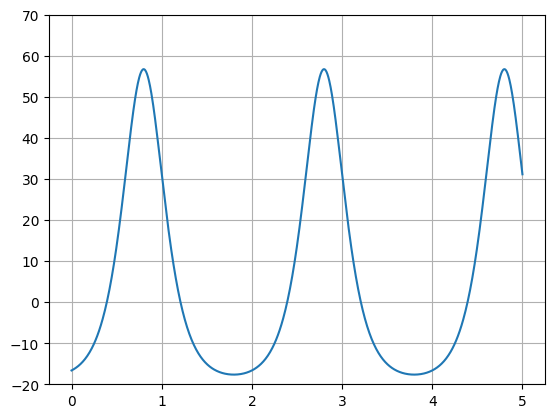

In [27]:
fi = np.linspace(0,5,1000)
ydd = yddonfi(fi*3.1416)
plt.ylim(-20, 70)

plt.plot(fi, ydd)
plt.grid()

In [8]:

fi = np.linspace(0,5,5000)
for fic in fi:
    if -9.81 < yddonfi(fic) < -9.79:
        print(fic)
        



1.7083416683336667
1.7093418683736747
4.573914782956591
4.574914982996599
